In [54]:
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from CMP_functions import *

In [74]:
path = '../data/cleaned_by_Alex/'

In [75]:
tissues = [x.split('/')[-1] for x in glob.glob(path+'/*')]  

In [76]:
tissues

['Skin',
 'Large_Intestine',
 'Central_Nervous_System',
 'Lung',
 'Breast',
 'Kidney',
 'Esophagus',
 'Bone',
 'Head_and_Neck',
 'Stomach',
 'Peripheral_Nervous_System',
 'Haematopoietic_and_Lymphoid',
 'Pancreas',
 'Ovary']

In [78]:
import os

for tissue in tissues:
    os.mkdir(tissue)

In [39]:
low_quality_im = []

low_plus_test = []

In [70]:
c = 0


tick = []
labels = []
good_top = []
test_top = []
bad_top = []


for tissue in tissues:
    print ()
    print (tissue)
    
    ims = glob.glob(f'{path}/{tissue}/*.jpg')
    print ('good quality=',len(ims))
    
    top = glob.glob(f'{path}/{tissue}/Top 3/*.jpg')
    print ('top=',len(top))
    
    for good_i in top: 
        low_plus_test.append(good_i.split('/')[-1])
    
    deleted = glob.glob(f'{path}/{tissue}/Low Quality/*.jpg')
    print ('low quality=',len(deleted))
    
    for i in deleted:
        low_quality_im.append(i.split('/')[-1])
        low_plus_test.append(i.split('/')[-1])
        
    tick.append(c)
    labels.append(tissue.replace('_', '\n'))
    good_top.append(len(ims))
    test_top.append(len(top))
    bad_top.append(len(deleted))

        
        
    c += 1
    
test_bottom = [a+b for a,b in zip(good_top,bad_top)]


Skin
good quality= 37
top= 3
low quality= 1

Large_Intestine
good quality= 36
top= 3
low quality= 3

Central_Nervous_System
good quality= 34
top= 3
low quality= 0

Lung
good quality= 118
top= 3
low quality= 29

Breast
good quality= 46
top= 3
low quality= 8

Kidney
good quality= 20
top= 3
low quality= 0

Esophagus
good quality= 19
top= 3
low quality= 0

Bone
good quality= 22
top= 3
low quality= 1

Head_and_Neck
good quality= 21
top= 3
low quality= 0

Stomach
good quality= 14
top= 3
low quality= 6

Peripheral_Nervous_System
good quality= 20
top= 3
low quality= 4

Haematopoietic_and_Lymphoid
good quality= 71
top= 3
low quality= 48

Pancreas
good quality= 20
top= 3
low quality= 0

Ovary
good quality= 35
top= 3
low quality= 2


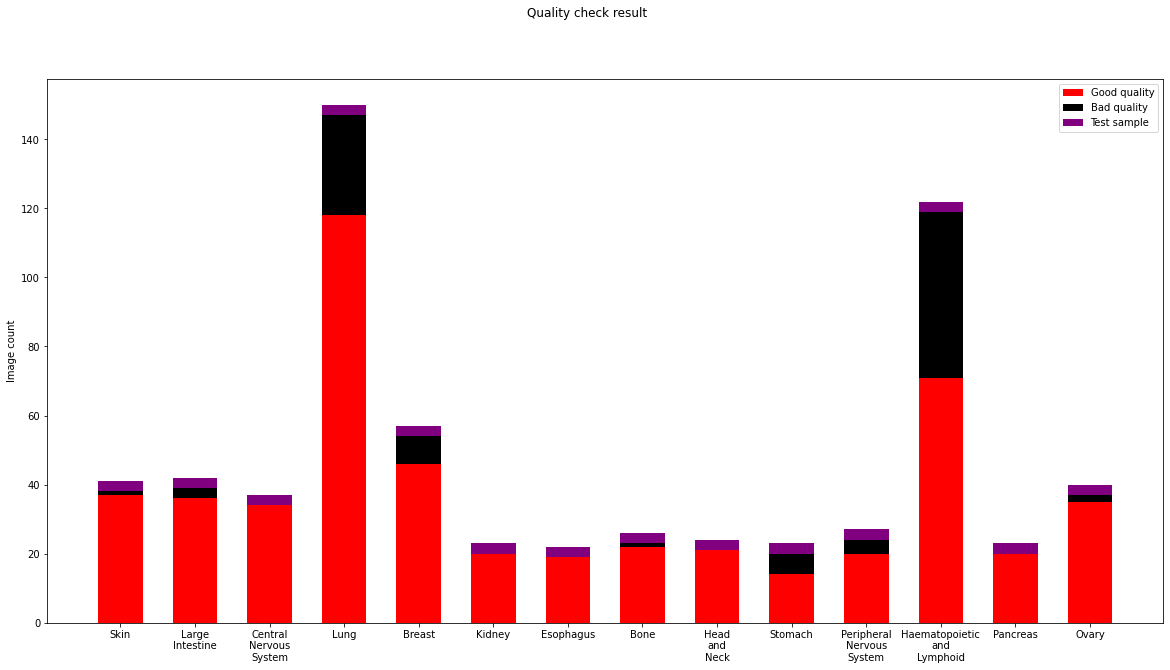

In [79]:
rotation = 0
width = 0.6
alpha = 0.3

fig, ax1 = plt.subplots(figsize=(20,10))

_ = fig.suptitle(f'Quality check result')

# _ = ax1.set_xlabel('Tissue')
_ = ax1.set_ylabel('Image count')


_ = ax1.bar(tick, good_top, width=width, label="Good quality", color = 'red')
_ = ax1.bar(tick, bad_top ,bottom=good_top, width=width, label="Bad quality", color = 'black')
_ = ax1.bar(tick, test_top ,bottom=test_bottom, width=width, label="Test sample", color = 'purple')


_ = ax1.set_xticks(tick)
_ = ax1.set_xticklabels(labels, rotation=rotation)
_ = ax1.legend()


plt.savefig(f'Quality_check_results.png')

In [68]:
low_quality_im_flowi = [x.replace('.jpg','_flowi') for x in low_quality_im]
low_plus_test = [x.replace('.jpg','_flowi') for x in low_plus_test]

In [37]:
tables = glob.glob('../data/pipeline_tables/tissue_flowi/*')

In [36]:
for tab in tables:
    df = pd.read_csv(tab)
    
    name = tab.split('/')[-1]
#     print(name)
    
#     print ('len before clean =', len(df.index))
    
    df_clean = df.set_index(df.im_id)
    df_clean = df_clean.drop(index=low_quality_im_flowi)
    
    df_clean.to_csv(name.replace('.csv', '_clean.csv'), index=False)
    
#     print ('len after clean =', len(df_clean.index))

Large_Intestine_table_flowi.csv
len before clean = 736
len after clean = 634
Skin_table_flowi.csv
len before clean = 736
len after clean = 634
Haematopoietic_and_Lymphoid_table_flowi.csv
len before clean = 736
len after clean = 634
Esophagus_table_flowi.csv
len before clean = 736
len after clean = 634
Bone_table_flowi.csv
len before clean = 736
len after clean = 634
Breast_table_flowi.csv
len before clean = 736
len after clean = 634
Head_and_Neck_table_flowi.csv
len before clean = 736
len after clean = 634
Peripheral_Nervous_System_table_flowi.csv
len before clean = 736
len after clean = 634
Lung_table_flowi.csv
len before clean = 736
len after clean = 634
Central_Nervous_System_table_flowi.csv
len before clean = 736
len after clean = 634
Stomach_table_flowi.csv
len before clean = 736
len after clean = 634
Pancreas_table_flowi.csv
len before clean = 736
len after clean = 634
Kidney_table_flowi.csv
len before clean = 736
len after clean = 634
Ovary_table_flowi.csv
len before clean = 736

In [45]:
for tab in tables:
    df = pd.read_csv(tab)
    
    name = tab.split('/')[-1]
    print(name)
    
    print ('len before clean =', len(df.index))
    
    df_clean = df.set_index(df.im_id)
    df_clean = df_clean.drop(index=low_plus_test)
    
    df_clean.to_csv(name.replace('.csv', '_clean_noTEST.csv'), index=False)
    
    print ('len after clean =', len(df_clean.index))

Large_Intestine_table_flowi.csv
len before clean = 736
len after clean = 592
Skin_table_flowi.csv
len before clean = 736
len after clean = 592
Haematopoietic_and_Lymphoid_table_flowi.csv
len before clean = 736
len after clean = 592
Esophagus_table_flowi.csv
len before clean = 736
len after clean = 592
Bone_table_flowi.csv
len before clean = 736
len after clean = 592
Breast_table_flowi.csv
len before clean = 736
len after clean = 592
Head_and_Neck_table_flowi.csv
len before clean = 736
len after clean = 592
Peripheral_Nervous_System_table_flowi.csv
len before clean = 736
len after clean = 592
Lung_table_flowi.csv
len before clean = 736
len after clean = 592
Central_Nervous_System_table_flowi.csv
len before clean = 736
len after clean = 592
Stomach_table_flowi.csv
len before clean = 736
len after clean = 592
Pancreas_table_flowi.csv
len before clean = 736
len after clean = 592
Kidney_table_flowi.csv
len before clean = 736
len after clean = 592
Ovary_table_flowi.csv
len before clean = 736